In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Regression_Data.csv')

In [ ]:
data.head()

,Ind_Data,Dependent_Data
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
X=data['Ind_Data'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y=data['Dependent_Data'].values.reshape(-1,1)
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

### Visualize the data

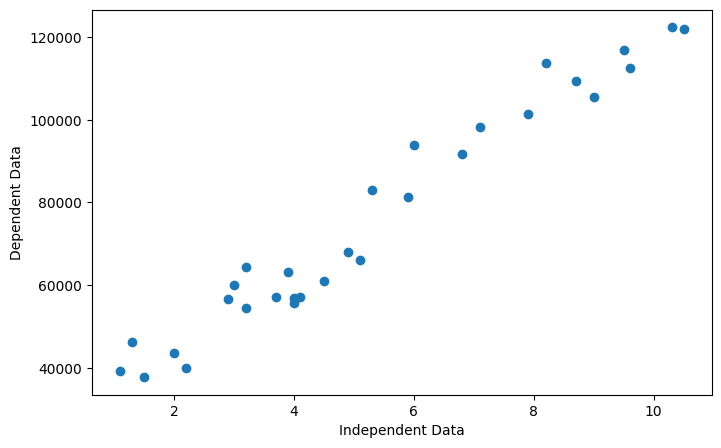

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.xlabel('Independent Data')
plt.ylabel('Dependent Data')
plt.show()

### Transforming to torch tensor

In [ ]:
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
X

tensor([[ 1.1000],
        [ 1.3000],
        [ 1.5000],
        [ 2.0000],
        [ 2.2000],
        [ 2.9000],
        [ 3.0000],
        [ 3.2000],
        [ 3.2000],
        [ 3.7000],
        [ 3.9000],
        [ 4.0000],
        [ 4.0000],
        [ 4.1000],
        [ 4.5000],
        [ 4.9000],
        [ 5.1000],
        [ 5.3000],
        [ 5.9000],
        [ 6.0000],
        [ 6.8000],
        [ 7.1000],
        [ 7.9000],
        [ 8.2000],
        [ 8.7000],
        [ 9.0000],
        [ 9.5000],
        [ 9.6000],
        [10.3000],
        [10.5000]])

### Create neural Network

In [ ]:
model=nn.Sequential(nn.Linear(1,1))
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

### Setting the parameters

In [ ]:
learningRate=0.001
lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learningRate)

### Training the Neural Network

In [ ]:
epochs=5001 # number of times we pass the data to the neural network
losses=torch.zeros(epochs)
for epoch in range(epochs):
  ypred=model(X)
  loss=lossfunc(ypred,y)
  losses[epoch]=loss
  # Back propagation
  optimizer.zero_grad()
  # The purpose of optimizer.zero_grad() is to clear the gradients from the previous step.
  # By default, in PyTorch, gradients are accumulated across multiple backward passes.
  # This means that if you don't clear the gradients before each backward pass, they will be
  # added to the previous ones, which can lead to incorrect updates and make training unstable.
  loss.backward() # Calculate Gradient of all Parameters
  optimizer.step() # used to update the parameter so that error could be reduced.
  if (epoch % 100)==0:
    print(f'epochs:{epoch} loss : {loss.item(): 1.2f}')

epochs:0 loss :  6503336448.00
epochs:100 loss :  144396224.00
epochs:200 loss :  135215264.00
epochs:300 loss :  126780704.00
epochs:400 loss :  119030560.00
epochs:500 loss :  111909264.00
epochs:600 loss :  105365872.00
epochs:700 loss :  99353400.00
epochs:800 loss :  93828848.00
epochs:900 loss :  88752544.00
epochs:1000 loss :  84088184.00
epochs:1100 loss :  79802296.00
epochs:1200 loss :  75864224.00
epochs:1300 loss :  72245664.00
epochs:1400 loss :  68920784.00
epochs:1500 loss :  65865672.00
epochs:1600 loss :  63058460.00
epochs:1700 loss :  60479056.00
epochs:1800 loss :  58108956.00
epochs:1900 loss :  55931140.00
epochs:2000 loss :  53930084.00
epochs:2100 loss :  52091400.00
epochs:2200 loss :  50401924.00
epochs:2300 loss :  48849536.00
epochs:2400 loss :  47423116.00
epochs:2500 loss :  46112448.00
epochs:2600 loss :  44908120.00
epochs:2700 loss :  43801520.00
epochs:2800 loss :  42784748.00
epochs:2900 loss :  41850456.00
epochs:3000 loss :  40991976.00
epochs:3100 

In [ ]:
ypred

tensor([[ 33779.9141],
        [ 35755.2891],
        [ 37730.6641],
        [ 42669.1016],
        [ 44644.4766],
        [ 51558.2930],
        [ 52545.9805],
        [ 54521.3555],
        [ 54521.3555],
        [ 59459.7930],
        [ 61435.1680],
        [ 62422.8555],
        [ 62422.8555],
        [ 63410.5430],
        [ 67361.2969],
        [ 71312.0469],
        [ 73287.4219],
        [ 75262.7969],
        [ 81188.9219],
        [ 82176.6094],
        [ 90078.1094],
        [ 93041.1719],
        [100942.6719],
        [103905.7344],
        [108844.1719],
        [111807.2344],
        [116745.6719],
        [117733.3672],
        [124647.1797],
        [126622.5469]], grad_fn=<AddmmBackward0>)

In [ ]:
ypred.detach()

tensor([[ 33779.9141],
        [ 35755.2891],
        [ 37730.6641],
        [ 42669.1016],
        [ 44644.4766],
        [ 51558.2930],
        [ 52545.9805],
        [ 54521.3555],
        [ 54521.3555],
        [ 59459.7930],
        [ 61435.1680],
        [ 62422.8555],
        [ 62422.8555],
        [ 63410.5430],
        [ 67361.2969],
        [ 71312.0469],
        [ 73287.4219],
        [ 75262.7969],
        [ 81188.9219],
        [ 82176.6094],
        [ 90078.1094],
        [ 93041.1719],
        [100942.6719],
        [103905.7344],
        [108844.1719],
        [111807.2344],
        [116745.6719],
        [117733.3672],
        [124647.1797],
        [126622.5469]])

### Plot loss vs epoch

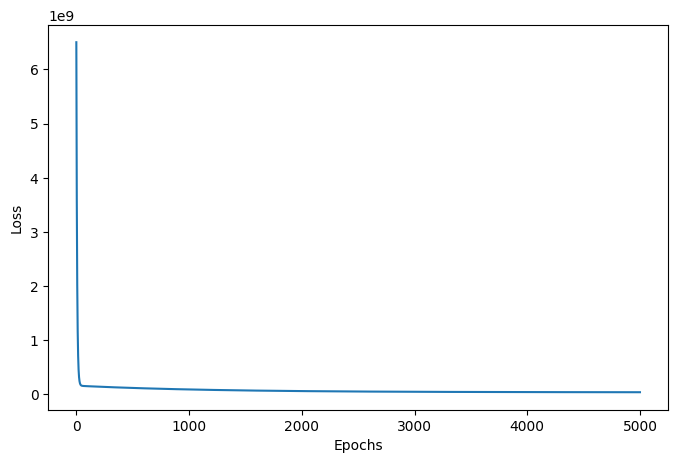

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(epochs),losses.detach())
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Weight and bias of Trained Model

In [ ]:
model[0].weight.detach().numpy()

array([[9876.695]], dtype=float32)

In [ ]:
model[0].bias.detach().numpy()

array([22916.568], dtype=float32)

### Creating a test data

In [ ]:
test_data=np.linspace(0,11,30).reshape(-1,1)
test_data

array([[ 0.        ],
       [ 0.37931034],
       [ 0.75862069],
       [ 1.13793103],
       [ 1.51724138],
       [ 1.89655172],
       [ 2.27586207],
       [ 2.65517241],
       [ 3.03448276],
       [ 3.4137931 ],
       [ 3.79310345],
       [ 4.17241379],
       [ 4.55172414],
       [ 4.93103448],
       [ 5.31034483],
       [ 5.68965517],
       [ 6.06896552],
       [ 6.44827586],
       [ 6.82758621],
       [ 7.20689655],
       [ 7.5862069 ],
       [ 7.96551724],
       [ 8.34482759],
       [ 8.72413793],
       [ 9.10344828],
       [ 9.48275862],
       [ 9.86206897],
       [10.24137931],
       [10.62068966],
       [11.        ]])

In [ ]:
X_test=torch.tensor(test_data,dtype=torch.float32)
X_test

tensor([[ 0.0000],
        [ 0.3793],
        [ 0.7586],
        [ 1.1379],
        [ 1.5172],
        [ 1.8966],
        [ 2.2759],
        [ 2.6552],
        [ 3.0345],
        [ 3.4138],
        [ 3.7931],
        [ 4.1724],
        [ 4.5517],
        [ 4.9310],
        [ 5.3103],
        [ 5.6897],
        [ 6.0690],
        [ 6.4483],
        [ 6.8276],
        [ 7.2069],
        [ 7.5862],
        [ 7.9655],
        [ 8.3448],
        [ 8.7241],
        [ 9.1034],
        [ 9.4828],
        [ 9.8621],
        [10.2414],
        [10.6207],
        [11.0000]])

In [ ]:
yt=model(X_test)
yt

tensor([[ 22916.5684],
        [ 26662.9004],
        [ 30409.2344],
        [ 34155.5664],
        [ 37901.8984],
        [ 41648.2344],
        [ 45394.5625],
        [ 49140.8984],
        [ 52887.2305],
        [ 56633.5625],
        [ 60379.8984],
        [ 64126.2266],
        [ 67872.5625],
        [ 71618.8906],
        [ 75365.2266],
        [ 79111.5625],
        [ 82857.8906],
        [ 86604.2266],
        [ 90350.5625],
        [ 94096.8906],
        [ 97843.2266],
        [101589.5547],
        [105335.8906],
        [109082.2266],
        [112828.5547],
        [116574.8906],
        [120321.2188],
        [124067.5547],
        [127813.8828],
        [131560.2188]], grad_fn=<AddmmBackward0>)

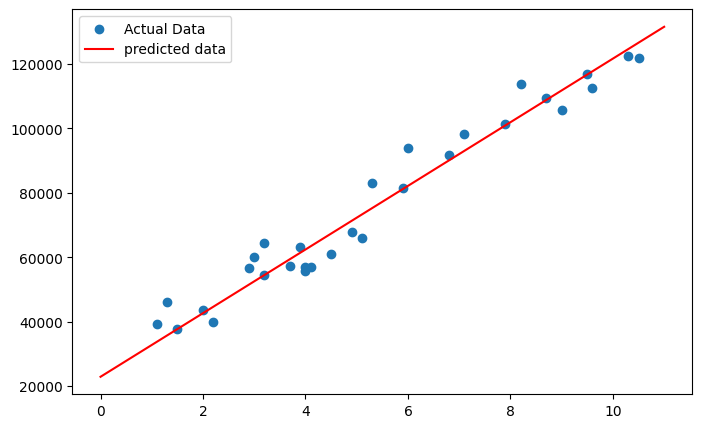

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,label='Actual Data')
plt.plot(test_data,yt.detach(),color='red',label='predicted data')
plt.legend()
plt.show()

### Check the performance of the model

In [ ]:
from sklearn import metrics
import numpy as np

# Assuming y and yt are your true and predicted values, and are on the GPU
# Move them to the CPU and convert to NumPy arrays
y_cpu = y.cpu().numpy()
yt_cpu = yt.cpu().detach().numpy()

# Calculate RMSE, MAE, and R2
print("RMSE", np.sqrt(metrics.mean_squared_error(y_cpu, yt_cpu)))
print("MAE", metrics.mean_absolute_error(y_cpu, yt_cpu))
print("R2", metrics.r2_score(y_cpu, yt_cpu))


RMSE 9997.556101367974
MAE 8527.6083984375
R2 0.8624208569526672
